## How to run Metient-calibrate on a subset of real metastatic NSCLC patients (TRACERx)

### To run this notebook, you'll need metient installed:

```bash
mamba create -n "met" python=3.8.8 ipython
mamba activate met
pip install metient
```

### Import libraries and setup paths

In [1]:
import os
from metient import metient as met

### Setup paths
tracerx_dir = os.path.join(os.getcwd(), "metient", "data", "tracerx_nsclc")
# Path to where our clone trees are located (clustered with pyclone -> clone tree from pairtree)
clone_trees_dir = os.path.join(tracerx_dir, "orchard_trees", "conipher_pyclone_clustered")
# Path to where our tsvs are located
tsv_dir = os.path.join(tracerx_dir, "patient_data", "conipher_pyclone_clustered")
# Path to save outputs
output_dir = os.path.join(os.getcwd(), 'tutorial_outputs')

CUDA GPU: False


### An example of the expected tsv file format for patient CRUK0010
**The required columns are:**
`anatomical_site_index, anatomical_site_label, character_index, character_label, ref, var, var_read_prob, site_category`

In [2]:
import pandas as pd
pd.read_csv(os.path.join(tsv_dir, "CRUK0010_clustered_SNVs.tsv"), sep="\t").head()

,Unnamed: 0,Unnamed: 0.1,anatomical_site_index,anatomical_site_label,character_index,character_label,ref,var,var_read_prob,site_category,ploidy,purity,sample_type,sample_index,original_anatomical_site_label,sample_label,major_cn,minor_cn,num_mutations,full_label
0,0,0,0,LN_SU_FLN1,0,SETD2_CHD8,17447,2523,0.184,metastasis,1.900,0.250,metastasis,3,LN_SU_FLN1,CRUK0010_SU_FLN1,1.542,0.667,48,PCF11:11:82878608:A;BOD1L1:4:13601028:G;ITIH5:...
1,1,1,1,metachronousMet_BR_LN1,0,SETD2_CHD8,12077,1627,0.178,metastasis,2.000,0.250,metastasis,0,metachronousMet_BR_LN1,CRUK0010_BR_LN1,1.479,0.688,48,PCF11:11:82878608:A;BOD1L1:4:13601028:G;ITIH5:...
2,2,2,2,metachronousMet_BR_LN2,0,SETD2_CHD8,16622,1949,0.145,metastasis,2.150,0.200,metastasis,1,metachronousMet_BR_LN2,CRUK0010_BR_LN2,1.500,0.688,48,PCF11:11:82878608:A;BOD1L1:4:13601028:G;ITIH5:...
3,3,3,3,metachronousMet_BR_LN3,0,SETD2_CHD8,16966,2300,0.165,metastasis,2.200,0.220,metastasis,2,metachronousMet_BR_LN3,CRUK0010_BR_LN3,1.583,0.688,48,PCF11:11:82878608:A;BOD1L1:4:13601028:G;ITIH5:...
4,4,4,4,primary_SU_T1,0,SETD2_CHD8,28865,10586,0.344,primary,2.225,0.475,primary,4,primary_SU_T1.R2;primary_SU_T1.R1,CRUK0010_SU_T1.R1;CRUK0010_SU_T1.R2,1.615,0.698,48,PCF11:11:82878608:A;BOD1L1:4:13601028:G;ITIH5:...


## Step 1: Load filepaths to clone trees and tsv files for each patient

In [3]:
patients = ["CRUK0003", "CRUK0010", "CRUK0013", "CRUK0029" ]
print("Patients:", patients)
clone_tree_fns = [os.path.join(clone_trees_dir, f"{patient}_tree.txt") for patient in patients]
ref_var_fns = [os.path.join(tsv_dir, f"{patient}_clustered_SNVs.tsv") for patient in patients]

Patients: ['CRUK0003', 'CRUK0010', 'CRUK0013', 'CRUK0029']


## Step 2: Run Metient-calibrate

Saving results to /lila/data/morrisq/divyak/projects/metient/tutorial_outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/tutorial_outputs/calibrate
Calibrating for patient: CRUK0003
Calculated batch size: 11776
Restructuring adjacency matrix for CRUK0003_primary_SU_T1 since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:07<00:00, 10.17it/s]


# final solutions: 1
Calibrating for patient: CRUK0010
Calculated batch size: 768


100%|██████████| 75/75 [00:00<00:00, 82.16it/s]


# final solutions: 4
Calibrating for patient: CRUK0013
Calculated batch size: 768


100%|██████████| 75/75 [00:00<00:00, 83.38it/s]


# final solutions: 4
Calibrating for patient: CRUK0029
Calculated batch size: 16896


100%|██████████| 75/75 [00:33<00:00,  2.23it/s]


# final solutions: 12
Calibrating to 4 patients
Optimized thetas: tensor([0.3460, 0.3270, 0.3270], grad_fn=<DivBackward0>)
CRUK0003_primary_SU_T1
5 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

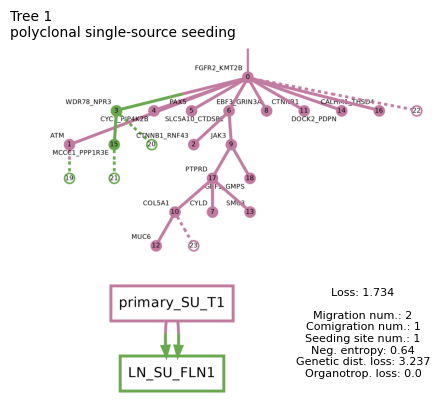

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)


CRUK0010_primary_SU_T1
5 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

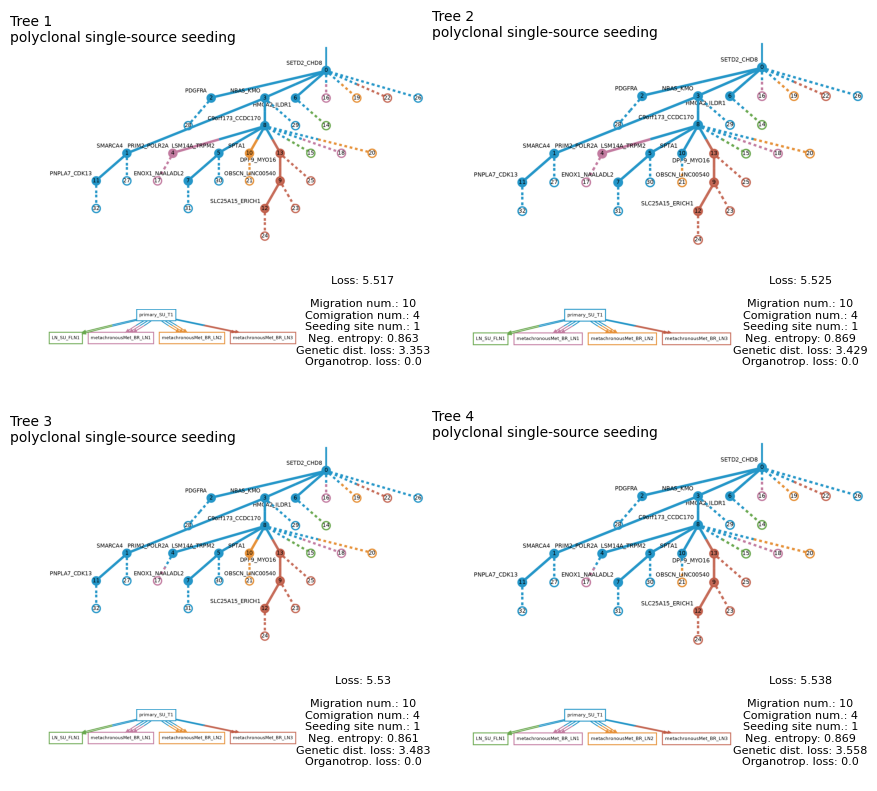

CRUK0013_primary_SU_T1
5 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

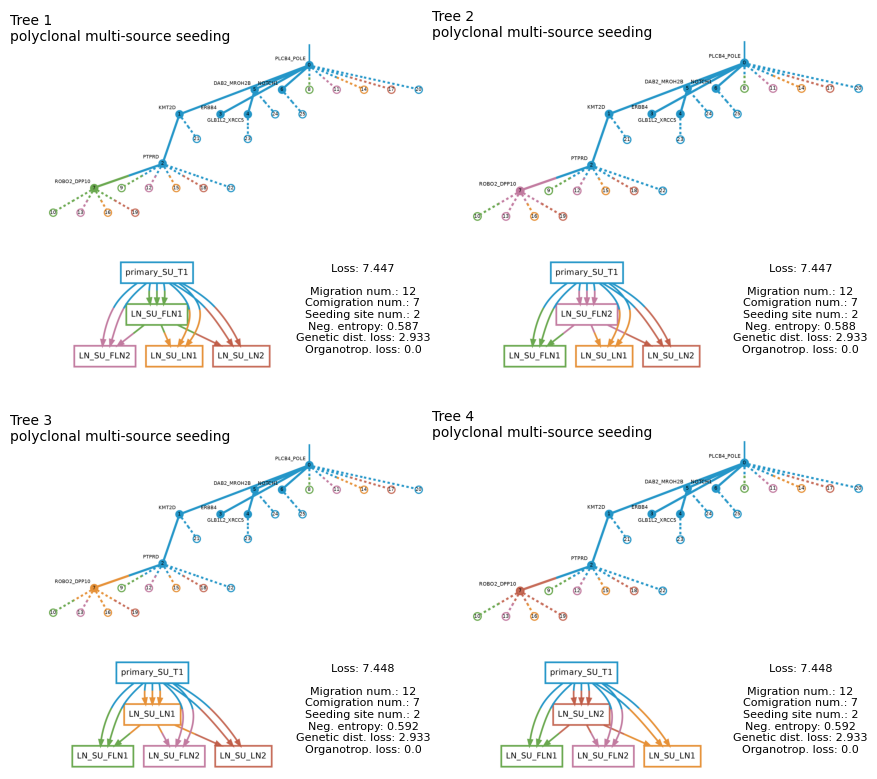

CRUK0029_primary_SU_T1


<Figure size 640x480 with 0 Axes>

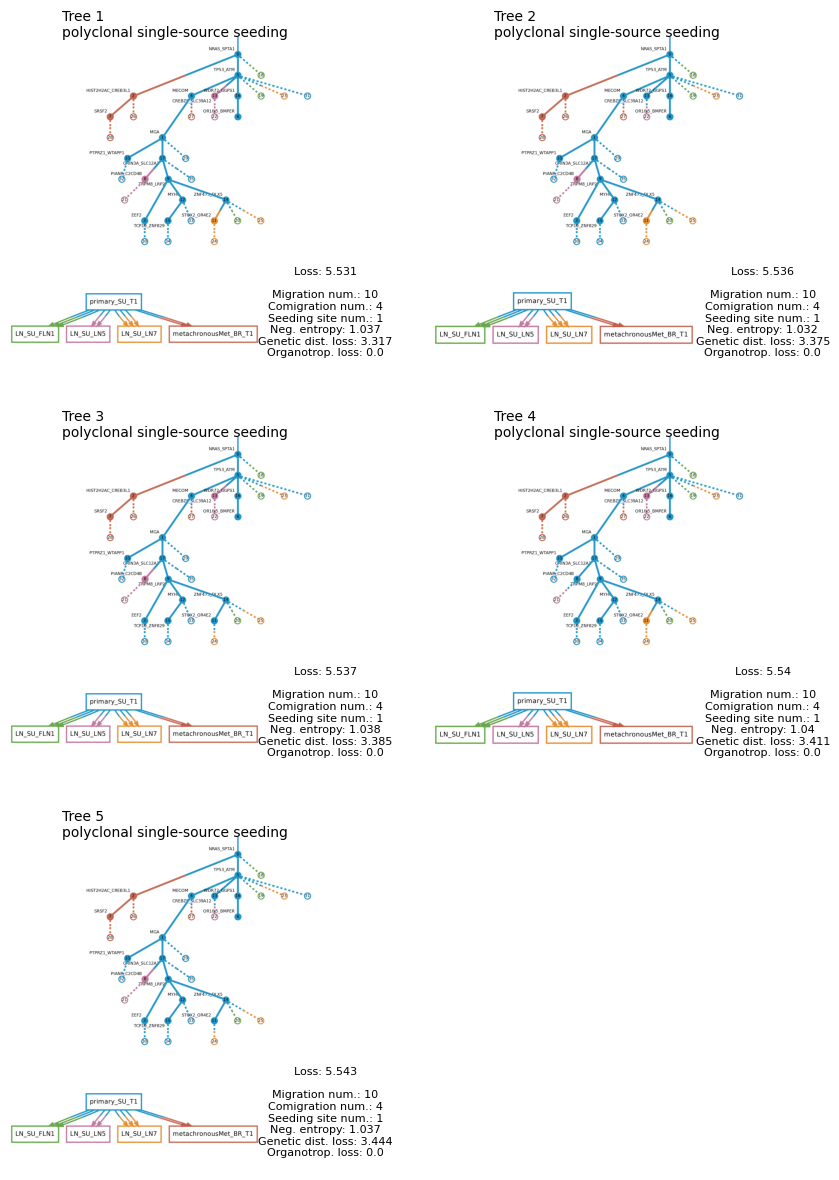

[0.3460172414779663, 0.32699140906333923, 0.32699140906333923]

In [4]:
weights = met.Weights(gen_dist=0.1)
print_config = met.PrintConfig(visualize=True, verbose=False, k_best_trees=5)
met.calibrate(clone_tree_fns, ref_var_fns, print_config, 
              output_dir, patients)


## Step 3: Use the pickle file outputs for downstream analysis

### In addition to the visualizations that Metient provides, we also save pkl.gz files for each Metient run that contain all the results of the run.

In [9]:
import gzip
import pickle

with gzip.open(os.path.join(output_dir,"calibrate", "CRUK0003_primary_SU_T1.pkl.gz") ,"rb") as f:
    pckl = pickle.load(f)
print(pckl.keys())

# V is the best ancestral labeling
V = pckl['ancestral_labelings'][0]
# A is the adjacency matrix that is the input clone tree + inferred leaf nodes
A = pckl['full_adjacency_matrices'][0]
# G represents the migration graph
G = met.get_migration_graph(V, A)

print("\nmigration graph:\n", G)
# Get the seeding pattern for this patient (e.g. "polyconal single-source seeding")
seeding_pattern = met.get_verbose_seeding_pattern(V, A)
print("\ninferred seeding pattern:\n", seeding_pattern)

dict_keys(['ancestral_labelings', 'losses', 'full_tree_node_idx_to_labels', 'full_adjacency_matrices', 'ordered_anatomical_sites', 'loss_dict', 'primary_site', 'subclonal_presence_matrices', 'pars_weights', 'soft_v', 'gen_dist_matrices'])

migration graph:
 tensor([[0., 0.],
        [2., 0.]])

inferred seeding pattern:
 polyclonal primary single-source seeding
